#1. inciando um estudo dirigido ao básico de DataScience, aplicação de técnicas multivariadas
  1.1 importando uma biblioteca

In [3]:
import numpy as np
import pandas as pd

#noemando o banco de daodos de dados_titanic
dados_titanic = pd.read_csv('titanic3.csv')
#listando as colunas 
#print(dados_titanic.columns)
 
#pclass: classe do passageiro
#survived: sobreviveu (1 = sim, 0 = não)
#name: nome
#sex: sexo
#age: idade
#sibsp: número de irmãos/cônjuges a bordo
#parch: número de pais/filhos a bordo
#ticket: número do bilhete
#fare: tarifa paga
#cabin: cabine
#embarked: porto de embarque
#boat: bote salva-vidas
#body: número do corpo (identificação de vítimas)
#home.dest: destino residencial

#renomeando colunas
dados_titinaic = dados_titanic.rename(columns={
    "pclass": "classe",
    "survived": "sobreviveu",
    "name": "nome",
    "sex": "sexo",
    "age": "idade",
    "sibsp": "irmaos_conjuges",
    "parch": "pais_filhos",
    "ticket": "bilhete",
    "fare": "tarifa",
    "cabin": "cabine",
    "embarked": "embarque",
    "boat": "bote_salva_vidas",
    "body": "numero_corpo",
    "home.dest": "destino_residencial"
}, inplace=True)

#convertendo as caolunas para o tipo de dados
dados_titanic1 = dados_titanic.astype({"idade": float,
                                        "sobreviveu": 'category',
                                         "tarifa": float,
                                          'sexo' : "category",
                                           'classe': 'category',
                                             'bilhete': 'category',
                                               "irmaos_conjuges": int,
                                                 "pais_filhos": int
                                                   })

#removendo valores missing (nulos)
dados_titanic1 = dados_titanic1.dropna(subset=["idade", "tarifa"])


#2. Algumas medidas descritivas importantes, medidas de de tendencia central e diSpersão

In [4]:
#gerando alguns insights exploratorios
print(dados_titanic1.describe().loc[(["mean", 'std', 'min', "max", "50%"])])

          idade  irmaos_conjuges  pais_filhos      tarifa  numero_corpo
mean  29.851837         0.503349     0.421053   36.686080    160.033613
std   14.389194         0.912471     0.840052   55.732533     98.082975
min    0.170000         0.000000     0.000000    0.000000      1.000000
max   80.000000         8.000000     6.000000  512.329200    328.000000
50%   28.000000         0.000000     0.000000   15.750000    155.000000



#3. Gráfico de barras para a distribuição média de irmãoes/cônjuges por classe de passageiros

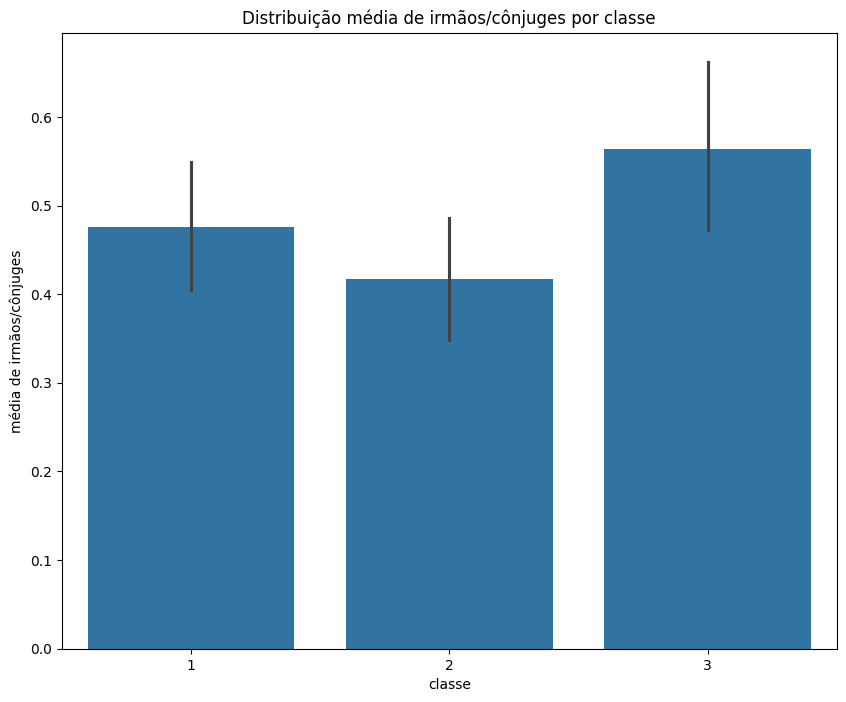

In [5]:
#graficos de barra para visualizar a distribuição das classes, sexo, bilhete e quem sobreviveu
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (10,8))
sns.barplot(x = "classe", y = "irmaos_conjuges", data=dados_titanic1)
plt.title("Distribuição média de irmãos/cônjuges por classe")
plt.ylabel('média de irmãos/cônjuges')
plt.show()


#4. Gráfico de barras para a distribuição relativa irmãoes/cônjuges por classe de passageiros

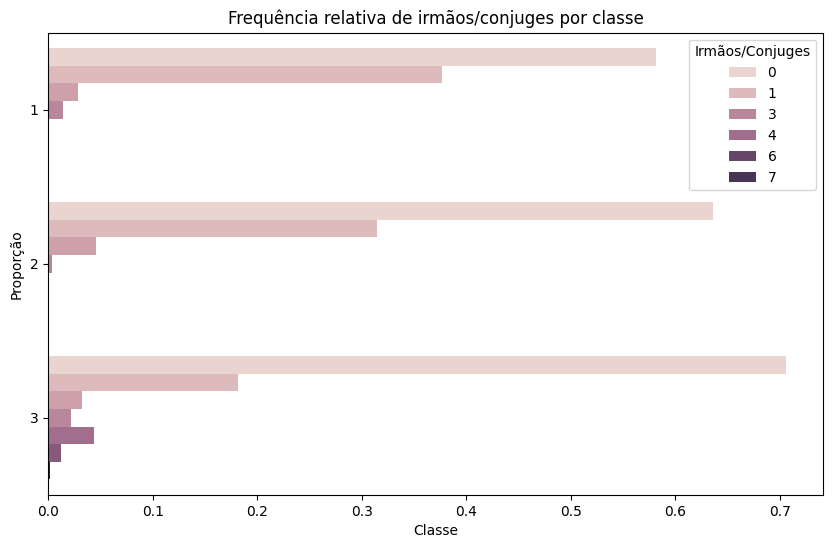

In [9]:
# Gráfico de barras com frequência relativa das classes usando seaborn
frequencia_irmaos = (
    dados_titanic1.groupby('classe', observed= True)['irmaos_conjuges']
    .value_counts(normalize=True)
    .rename('proporcao')
    .reset_index()
)
plt.figure(figsize=(10,6))
sns.barplot(y='classe', x='proporcao', hue='irmaos_conjuges', data=frequencia_irmaos)
plt.title('Frequência relativa de irmãos/conjuges por classe')
plt.ylabel('Proporção')
plt.xlabel('Classe')
plt.legend(title='Irmãos/Conjuges')
#plt.show()

#4. matriz de correlação de pearson para verificar a existência de relação linear entre as variáveis

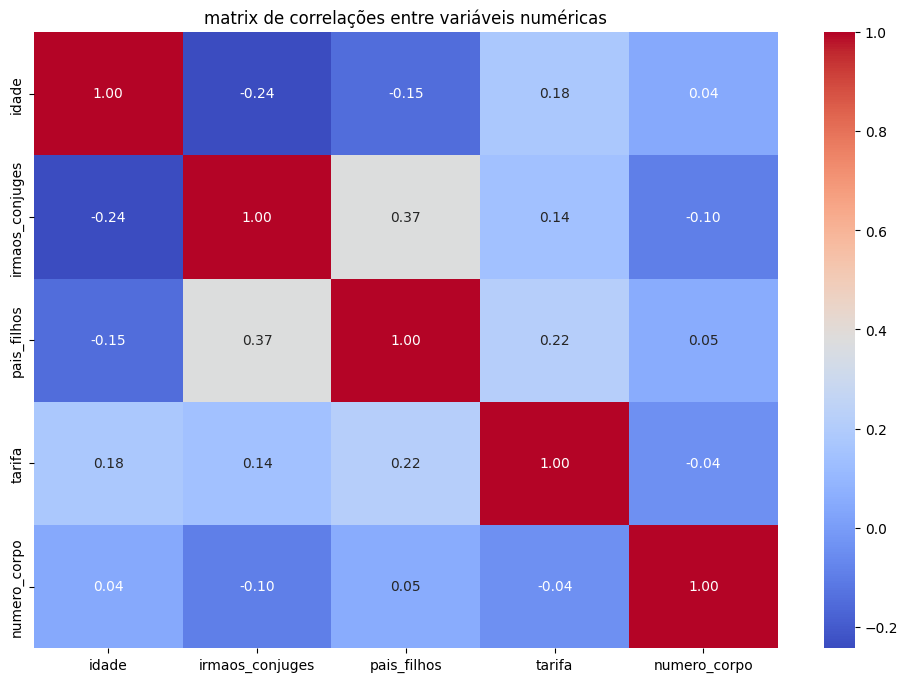

In [ ]:
# Gráfico de correlação entre todas as variáveis numéricas do DataFrame dados_titanic1
plt.figure(figsize=(12,8))
corr = dados_titanic1.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('matrix de correlações entre variáveis numéricas')
plt.show()

#5. Matriz de Pares para entender a distriibuição de cada uma das variáveis e tendência

<Figure size 1200x800 with 0 Axes>

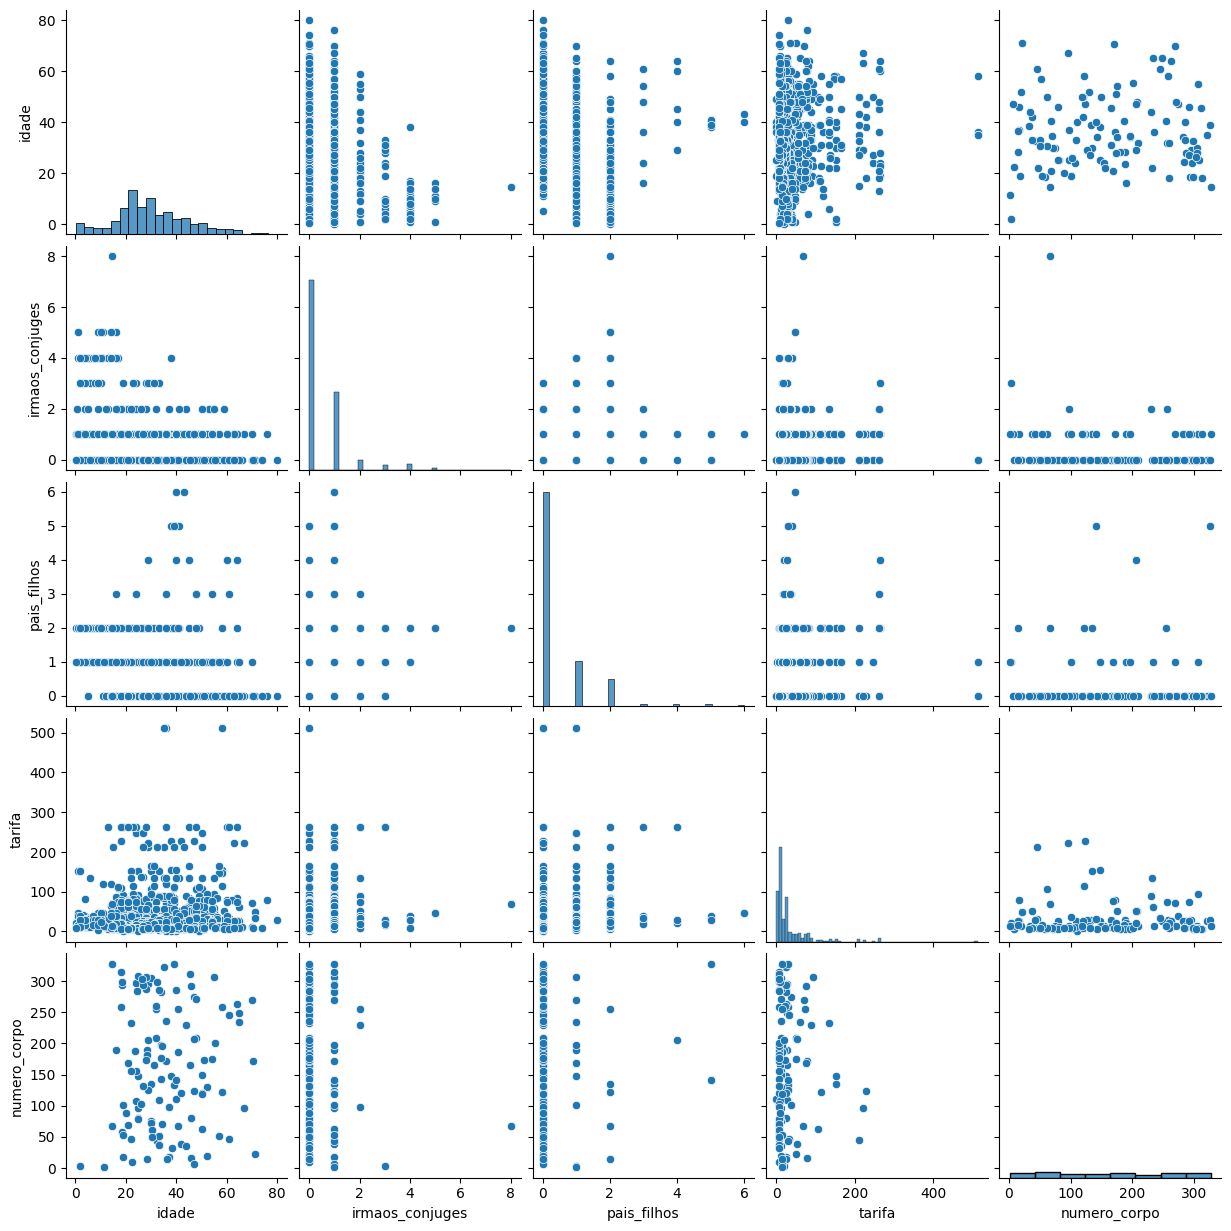

In [16]:
# Gráfico de correlação entre todas as variáveis numéricas do DataFrame dados_titanic1
plt.figure(figsize=(12,8))
sns.pairplot(dados_titanic1)


#6. teste de correlações entre variáveis numéricas e categóricas para entender melhor as relações entre as variáveis

In [25]:
import pandas as pd
from scipy.stats import pearsonr
import itertools
import numpy as np

# Desativar notação científica no pandas
pd.set_option('display.float_format', lambda x: f'{x:.6f}')

# Selecionar somente variáveis numéricas
df_num = dados_titanic1.select_dtypes(include=['number'])

resultados = []

# Gerar todas as combinações de pares de variáveis
for var1, var2 in itertools.combinations(df_num.columns, 2):
    corr, p = pearsonr(df_num[var1], df_num[var2])
    resultados.append([var1, var2, corr, p])

# DataFrame final
tabela_corr = pd.DataFrame(resultados, columns=[
    'Variável 1', 'Variável 2', 'Correlação (Pearson)', 'p-valor'
])

print(tabela_corr)


        Variável 1       Variável 2  Correlação (Pearson)  p-valor
0            idade  irmaos_conjuges             -0.243139 0.000000
1            idade      pais_filhos             -0.150241 0.000001
2            idade           tarifa              0.178740 0.000000
3            idade     numero_corpo                   NaN      NaN
4  irmaos_conjuges      pais_filhos              0.374291 0.000000
5  irmaos_conjuges           tarifa              0.141184 0.000005
6  irmaos_conjuges     numero_corpo                   NaN      NaN
7      pais_filhos           tarifa              0.216723 0.000000
8      pais_filhos     numero_corpo                   NaN      NaN
9           tarifa     numero_corpo                   NaN      NaN


Existe uma diversidade de téncicas multivariada que podemos aplicar, o estudo descritivo servi como porta inicial para podemos aplicar as técnicas sabemos os cuidados necessarios

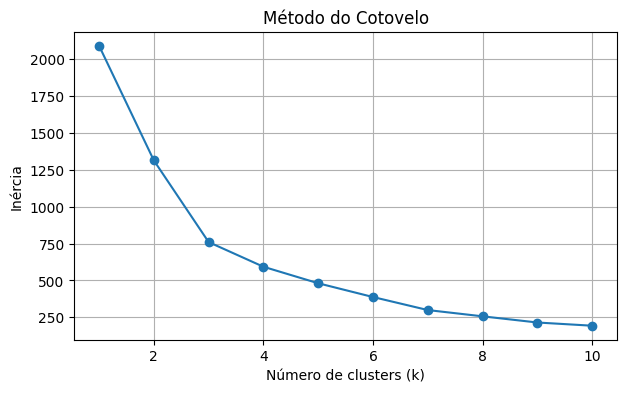


=== CENTROIDES ===
    idade   tarifa
0 21.2556  21.5367
1 45.2102  33.3435
2 38.0250 219.8605


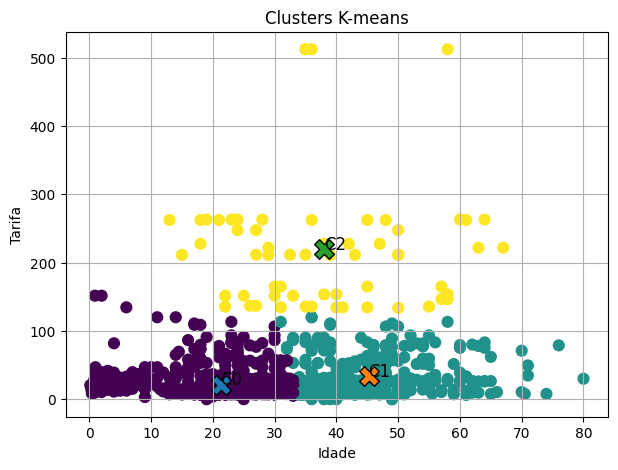


=== GRUPO 0 ===
                                         nome   idade  tarifa  cluster
763   Dean, Miss. Elizabeth Gladys "Millvina"  0.1700 20.5750        0
747   Danbom, Master. Gilbert Sigvard Emanuel  0.3300 14.4000        0
1240          Thomas, Master. Assad Alexander  0.4200  8.5167        0
427                 Hamalainen, Master. Viljo  0.6700 14.5000        0
658             Baclini, Miss. Helene Barbara  0.7500 19.2583        0
...                                       ...     ...     ...      ...
248                        Rowe, Mr. Alfred G 33.0000 26.5500        0
996                        Markun, Mr. Johann 33.0000  7.8958        0
457                    Hunt, Mr. George Henry 33.0000 12.2750        0
1269         Vande Velde, Mr. Johannes Joseph 33.0000  9.5000        0
1222                      Stankovic, Mr. Ivan 33.0000  8.6625        0

[652 rows x 4 columns]

=== GRUPO 1 ===
                                                   nome   idade   tarifa  \
213           

In [17]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# ===== 1. Seleção das variáveis =====
X = dados_titanic1[["idade", "tarifa"]]

# ===== 2. Padronização =====
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ===== 3. Método do Cotovelo =====
inertias = []
K = range(1, 11)

for k in K:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_scaled)
    inertias.append(km.inertia_)

plt.figure(figsize=(7,4))
plt.plot(K, inertias, marker="o")
plt.title("Método do Cotovelo")
plt.xlabel("Número de clusters (k)")
plt.ylabel("Inércia")
plt.grid(True)
plt.show()

# ===== 4. Escolher manualmente o k (ex: 3) =====
k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
dados_titanic1["cluster"] = kmeans.fit_predict(X_scaled)

# ===== 5. Centroides reais =====
centroides = kmeans.cluster_centers_
centroides_reais = scaler.inverse_transform(centroides)

print("\n=== CENTROIDES ===")
print(pd.DataFrame(centroides_reais, columns=["idade", "tarifa"]))

# ===== 6. Gráfico dos clusters =====
plt.figure(figsize=(7,5))
plt.scatter(dados_titanic1["idade"],
            dados_titanic1["tarifa"],
            c=dados_titanic1["cluster"],
            s=60)

# adicionar centroides
for i, c in enumerate(centroides_reais):
    plt.scatter(c[0], c[1], marker="X", s=200, edgecolor="black")
    plt.text(c[0], c[1], f"C{i}", fontsize=12)

plt.xlabel("Idade")
plt.ylabel("Tarifa")
plt.title("Clusters K-means")
plt.grid(True)
plt.show()

# ===== 7. Mostrar pessoas por grupo =====
for g in range(k):
    print(f"\n=== GRUPO {g} ===")
    print(dados_titanic1[dados_titanic1["cluster"] == g]
          [["nome","idade","tarifa","cluster"]]
          .sort_values("idade"))


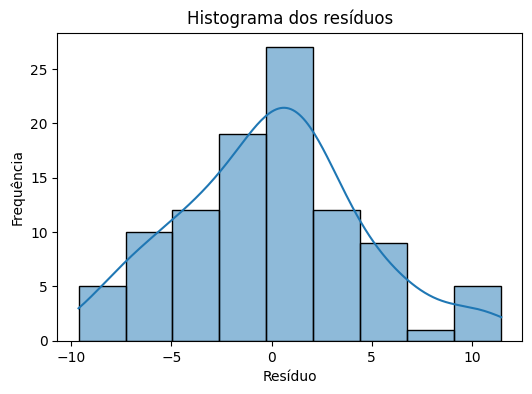

Teste de Shapiro-Wilk: estatística=0.9846, p-valor=0.2984
Os resíduos seguem distribuição normal (p >= 0.05)
Teste de Breusch-Pagan: estatística=0.0138, p-valor=0.9064
Não há evidência de heterocedasticidade (p >= 0.05)
Teste de Durbin-Watson: estatística=2.2850
Sem evidência de autocorrelação dos resíduos


In [ ]:
# Análise residual detalhada
import seaborn as sns

# 1. Histograma dos resíduos
plt.figure(figsize=(6,4))
sns.histplot(residuos, kde=True)
plt.title('Histograma dos resíduos')
plt.xlabel('Resíduo')
plt.ylabel('Frequência')
plt.show()

# 2. Teste de normalidade dos resíduos (Shapiro-Wilk)
shapiro_test = stats.shapiro(residuos)
print(f'Teste de Shapiro-Wilk: estatística={shapiro_test.statistic:.4f}, p-valor={shapiro_test.pvalue:.4f}')
if shapiro_test.pvalue < 0.05:
    print('Os resíduos NÃO seguem distribuição normal (p < 0.05)')
else:
    print('Os resíduos seguem distribuição normal (p >= 0.05)')

# 3. Teste de homocedasticidade (Breusch-Pagan)
from statsmodels.stats.diagnostic import het_breuschpagan
bp_test = het_breuschpagan(residuos, X)
print(f'Teste de Breusch-Pagan: estatística={bp_test[0]:.4f}, p-valor={bp_test[1]:.4f}')
if bp_test[1] < 0.05:
    print('Há evidência de heterocedasticidade (p < 0.05)')
else:
    print('Não há evidência de heterocedasticidade (p >= 0.05)')

# 4. Teste de autocorrelação dos resíduos (Durbin-Watson)
dw = sm.stats.durbin_watson(residuos)
print(f'Teste de Durbin-Watson: estatística={dw:.4f}')
if dw < 1.5 or dw > 2.5:
    print('Possível autocorrelação dos resíduos')
else:
    print('Sem evidência de autocorrelação dos resíduos')